# Naive Bayes Classifier

### The following few portions will be referencing resources mainly from Kilian Weinberger's materials from CS4780 [1] and Tom M.Mitchell's Machine Learning book [2] .


The primary goal of classification is to predict the label $y$ from a set of given features $X$. Given that we do not know the underlying distribution of $P(X,Y)$, we can only draw  $n$ samples from this distribution into our training set $D$, then estimate $P(Y|X)$ by the following according the conditional probability formula:

$$
\hat{P}(y|\mathbf{x}) = 
\frac{\hat{P}(y,\mathbf{x})}{P(\mathbf{x})} = 
\frac{\sum_{i=1}^{n} \frac{I(\mathbf{x}_i = \mathbf{x} \wedge {y}_i = y)}{n}} { \sum_{i=1}^{n} \frac{I(\mathbf{x}_i = \mathbf{x})}{n}} =
\frac{\sum_{i=1}^{n} I(\mathbf{x}_i = \mathbf{x} \wedge {y}_i = y)}{ \sum_{i=1}^{n} I(\mathbf{x}_i = \mathbf{x})}
$$

where $I(\mathbf{x}_i = \mathbf{x} \wedge {y}_i = y) = 1$ if $x_i = x$ and $y_i = y$, and $0$ otherwise.

The problem with estimating probabilities this way is that it can be difficult when $x$ exists in a high dimensional space, or when x is continuous.

#### Example: 

If we want to determine whether a person in a university is a student, it is easy to estimate $P(x)$ and $P(y,x)$ if the number of features we want to examine is small. 
If we were to only use 'age over or under 35' as a feature (1-D space binary feature), $P(x)$ can be estimated from our sample of $n$ samples simply by counting the number of people under the age of 35, and divide it by the number of people sampled $n$. Similarly, $P(y,x)$ can be estimated by counting the number of people with age less than 35 given that they are students.

However, if the number of features were to be added, estimating probabilities can be difficult. Take the extreme, we use each pixels in the person's potrait to determine if the person is a student. We will not be able to estimate $P(x)$ because we will not be able to achieve a standard for the pixel intensities a student should have. Given that it is pretty unlikely that no 2 people will look alike, $P(x)$ will be 0 and $P(y,x)$ will be 0. Similarly, if we were to use an actual age (down to the exact birth date) as a feature instead of an over under age as a feature, it will also be unlikely that someone will be found in our dataset.

To approach this dilemma, we use Naive Bayes to simplify the problem.

## Naive Bayes

From Bayes rule,

$$
P(y | \mathbf{x}) = \frac{P(\mathbf{x} | y)P(y)}{P(\mathbf{x})}
$$

It is also known as:

$$
\text {Posterior} = \frac{\text{Likelihood} * \text{Prior}} {\text{Evidence}}
$$


Estimating $P(y)$ can be easily done. Using the example from above, we can estimate the number of people that are students ($c$) simply by going through the dataset and counting how many of them are actually students $(y_i = c)$:

$$
P(y = c)  = \frac{\sum_{i=1}^{n} I(y_i = c)}{n} = \hat\pi_c \tag{1}
$$

The Naive Bayes algorithm makes estimating $P(x|y)$ easy by making the assumption that each feature $X = <X_1, ..., X_n >$ are conditionally independent from each other for the given label $y = c$. For the case of $X = <X_1, X_2 >$, this simplifies $P(\mathbf{x} | y)$ to based on conditional independence:

\begin{align}
    P(X | y=c) &= P(X_1, X_2 | y=c) \\
               &= P(X_1| y=c)P(X_2| y=c)
\end{align}

In general for d-dimensional feature vector,

$$
P(X | y=c) = \prod_{i = 1}^{d} P(X_i | y=c)
$$

The Bayes classifier can then be defined as:

\begin{align}
    h(\mathbf{x}) &= \operatorname*{argmax}_{y=c} P(y | \mathbf{x}) \\ 
                  &= \operatorname*{argmax}_{y=c} \; \frac{P(\mathbf{x} | y=c)P(y=c)}{P(\mathbf{x})} \\ 
                  &= \operatorname*{argmax}_{y=c} \; P(\mathbf{x} | y=c) P(y=c) && \text{($P(\mathbf{x})$ removed because it does not depend on $y$)} \\ 
                  &= \operatorname*{argmax}_{y=c} \; \prod_{i=1}^{d} P(x_i | y=c) P(y=c) && \text{(by the Naive Bayes assumption)}\\ 
                  &= \operatorname*{argmax}_{y=c} \; \sum_{i = 1}^{d} \log(P(x_i | y=c)) + \log(P(y=c)) && \text{(as log is a monotonic function)}
\end{align}

In reality, we know that Naive Bayes assumption of conditionally independent features often do not hold true. Going back to the example above, 2 possible features that are not conditionally independent, given that the chosen person is a student, are net worth and age. Students who are younger typically have a lower net worth.

Assuming that Naive Bayes assumption is true, estimating $log(P(x_i | y))$ is easier given that only one dimension for feature will need to be considered.

### Case #1: Categorical features

Case #1 involves features that each take on $J$ possible discrete values, for a given label $y = c$.

Example: Given that person chosen is a student, feature 1: gender (J=2 for binary, gender when born, not currently identifying as), feature 2: faculty (J=10-20? depending on university).

$$
\theta_{ijc} = P(X_i = x_{ij} | y = c)\\
\text{ and }\sum_{j=1}^{J} \theta_{ijc} = 1
$$

where $\theta_{ijc}$ refers to the probability of feature i taking on value j, given that the label is c.

Probability $\theta_{ijc}$ can be estimated as:

$$
\hat\theta_{ijc} = \frac{\sum_{i=1}^{n} I(y_i = c) I(x_{ij} = j) + l}{\sum_{i=1}^{n} I(y_i = c) + lJ}
$$

where $l$ refers to the smoothing parameter.

$$
\text{Estimate} = \begin{cases} 
                      \text{MLE} & l=0 \\
                      \text{Laplace smoothing} & l=+1 \\
                      \text{MAP} & l>0,l\neq +1
                   \end{cases}
$$

The Naive Bayes classifier comes to:

\begin{align}
h(\mathbf{x}) &= \operatorname*{argmax}_{y=c} \; \prod_{i=1}^{d} P(x_i | y=c) P(y=c) \\
              &\propto \operatorname*{argmax}_{y=c} \; \prod_{i=1}^{d} \hat\theta_{ijc} \hat\pi_c
\end{align}


### Case #2: Multinomial features

Case #2 involves features that each take on its count/frequency for a given label $y = c$.

Example: In word documents, the feature vector is really just a dictionary, where the index of this vector refers to a particular word in the english dictionary, and the value at that index refers to the frequency in which that word occurs in a document. Given that the documents that have been given the label as 'confidential', we can identify commonly encounted words as features belonging to 'confidential' documents. 

$$
\hat\theta_{jc} = \frac{\sum_{i = 1}^{n} I(y_i = c) x_{ij} + l}{\sum_{i=1}^{n} I(y_i = c) m_i + l \cdot d }
$$

where $x_{ij}$ refers to the number of times a particular word has appeared in the $i^{th}$ document, and $m_i$ refers to the total number of words drawn from that same document. $\hat\theta_{jc}$ refers to the estimated probability that a given word i will appear given that it's document has been classified as $y = c$.

For a given document i, given that $m_i$ words are drawn, the number of counts of a particular word j:

$$
x_{ij} \in \{0, 1, 2, ..., m\}
$$

The multinomial Naive Bayes classifier comes to:

$$
h(\mathbf{x}) \propto \operatorname*{argmax}_{y=c} \; \prod_{i=1}^{d} \hat\theta_{ijc} \hat\pi_c
$$

### Case #3: Continuous features (Gaussian Naive Bayes)

Case #3 involves features that take on continuous values, with each feature $j$ assumed to be drawn its own independent Gaussian distribution with its own mean $\mu_{jc}$ and variance $\sigma_{jc}^2$

$$
P(x_j \mid y=c) = \mathcal{N}\left(\mu_{jc}, \sigma^{2}_{jc}\right) = \frac{1}{\sqrt{2 \pi} \sigma_{jc}} e^{-\frac{1}{2} \left(\frac{x_j - \mu_{jc}}{\sigma_{jc}}\right)^2} \tag{2}
$$

The parameters that requires estimatation are the mean and the variance:

\begin{align}
\mu_{jc} &\leftarrow \frac{1}{n_c} \sum_{i = 1}^{n} I(y_i = c) x_{ij} && \text{where $n_c = \sum_{i=1}^{n} I(y_i = c)$} \\
\sigma_{jc}^2 &\leftarrow \frac{1}{n_c} \sum_{i=1}^{n} I(y_i = c)(x_{ij} - \mu_{jc})^2 
\end{align}

The multinomial Naive Bayes classifier comes to:

$$
h(\mathbf{x}) \propto \operatorname*{argmax}_{y=c} \; \prod_{j=1}^{d}\frac{1}{\sqrt{2 \pi} \sigma_{jc}} e^{-\frac{1}{2} \left(\frac{x_j - \mu_{jc}}{\sigma_{jc}}\right)^2}  \hat\pi_c
$$

### GNB algorithm below adapted from: https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/supervised_learning/naive_bayes.py

In [1]:
import numpy as np
import math


class GaussianNaiveBayes:
    
    """
    In general, Naive Bayes need to find Likelihood(2), Prior(1) terms to get the Posterior term 
    For GNB, this values will be dependent on the mean and var of each feature
    """
    
    def find_likelihood(self, param, c, x): 
        """ 
        Likelihood = Normal distribution formula
        """
        mean, var = param[0], param[1]
        numer = math.exp(-0.5 * ((x - mean)**2 / var))
        denom = math.sqrt(2 * math.pi * var)
        
        return numer / denom
    
    
    def find_prior(self, c): 
        """ 
        Prior = Number of samples with y == c / Total number of samples 
        """
        return np.mean(self.y == c)
    
    
    def fit(self, X, y):
        self.x = X
        self.y = y
        self.n = len(y)
        
        self.dict = {}
        
        # Find the different possible labels
        #Assumes that each label has at least a sample collected
        self.labels = np.unique(y) 
        
        #Go through each label
        #For that label, get the samples where y == that label
        for c in self.labels:
            X_c = X[np.where(self.y == c)]
            
            #X_c consists of a matrix where each row correspond to the sample with label == c
            #and each column corresponding to the different features
            #Need to calculate the mean and variance of each feature, or the mean and variance of each column
            #Each dictionary key corresponds to a label
            #The index of each element in the dictionary value corresponds to a feature
            #Each element is stored as (mean, feature)
            for feature in X_c.T:
                if c not in self.dict: #If first feature
                    self.dict[c] = [(np.mean(feature), np.var(feature))]
                else:
                    self.dict[c].append((np.mean(feature), np.var(feature)))
    
    
    def predict(self, X):
        
        y_pred = []
        
        for sample in X:
        
            posteriors = []

            for c in self.labels:

                prior = self.find_prior(c)

                for i in range(len(self.dict[c])):
                    likelihood = self.find_likelihood(self.dict[c][i], c, sample[i])
                    prior *= likelihood

                posteriors.append(prior)
            
            y_pred.append(np.argmax(posteriors))
    
        return np.array(y_pred)

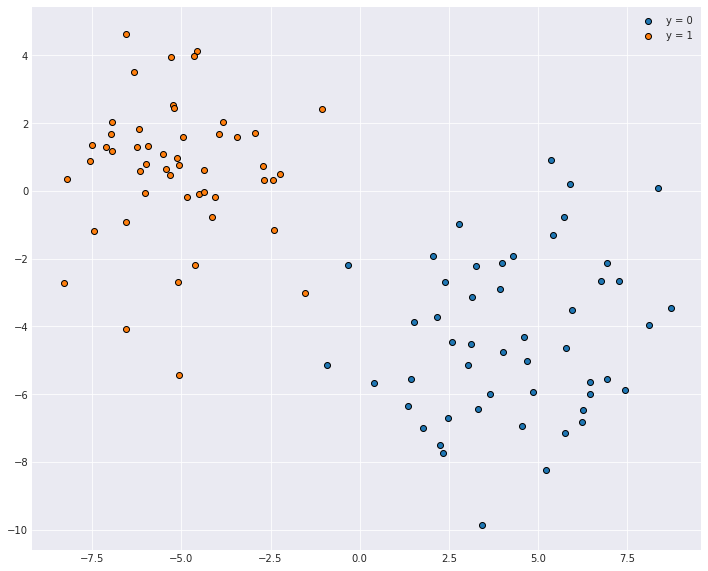

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import make_classification, make_blobs
from scipy.stats import multivariate_normal

X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.0, random_state=123)

with plt.style.context('seaborn-darkgrid'):
    fig = plt.figure(figsize=(12,10))
    
    plt.scatter(x=X[:][y == 0][:, 0], y=X[:][y == 0][:, 1], edgecolor='k', linewidth=1, label='y = 0')
    plt.scatter(x=X[:][y == 1][:, 0], y=X[:][y == 1][:, 1], edgecolor='k', linewidth=1, label='y = 1')

    plt.legend()

In [3]:
model = GaussianNaiveBayes()
model.fit(X, y)

### Decision boundary plot 

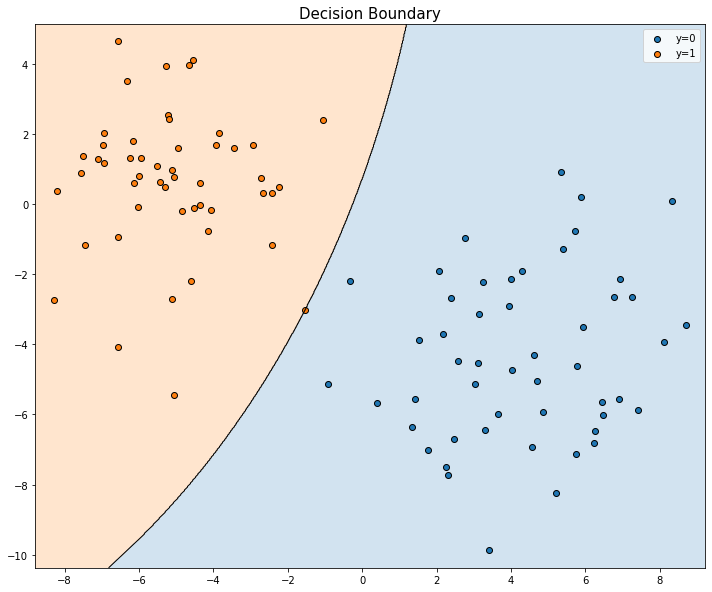

In [4]:
fig, ax = plt.subplots(figsize=(12, 10))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = 0.02 #Step size in mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cset = ax.contourf(xx, yy, Z, colors=['tab:blue', 'tab:orange'], levels=np.arange(Z.max() + 2) - 0.5, alpha=0.2)

ax1 = plt.scatter(x=X[:][y == 0][:, 0], y=X[:][y == 0][:, 1], edgecolor='k', linewidth=1, label='y=0')
ax2 = plt.scatter(x=X[:][y == 1][:, 0], y=X[:][y == 1][:, 1], edgecolor='k', linewidth=1, label='y=1')
ax3 = ax.contour(xx, yy, Z, cset.levels, colors='k', linewidths=1, antialiased=True)
plt.title('Decision Boundary', fontsize=15)
plt.legend()

### References
[1] CS4780/CS5780: Machine Learning for Intelligent Systems. Kilian Weinberger, 2017. https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote05.html

[2] Chapter 3 Generative and Discriminative Classifiers: Naive Bayes and Logisitic Regression. Tom M. Mitchell, 2017. Machine Learning. http://www.cs.cmu.edu/∼tom/mlbook/NBayesLogReg.pdf